#I - Importer des données de mesure stockées dans un tableur sous Python

Vous avez réalisé un jeu de mesures sur un tableur et avez obtenu un fichier type ".xls" ou ".xlsx" à l'aide d'Excel ou Libre Office. 

**Comment l'importer rapidement sur Python ?**


Nous allons pour cela utiliser les modules :
*   ```pandas``` pour l'import des données depuis le tableur
*  ```matplotlib.pyplot``` pour les tracés
* ```numpy```pour le traitement des tableaux







In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Dans un premier temps, on récupère les données qui sont dans le tableur. Une bonne pratique est que chaque grandeur corresponde à une colonne du tableur, et que la première ligne corresponde au nom de la grandeur et à son unité. Par exemple, dans notre fichier ```determinationg.xls```, les trois premières lignes sont :

 | $$\Delta t  \mbox{  (s)  }$$ |  $$u(\Delta t)  \mbox{  (s)  }$$  | $h  \mbox{  (m)  }$ | $$u(h)  \mbox{  (m)  }$$ |
 | ---------------|------------------------|-----------------|--------------- |
 |0,25|0,05|0,5|0,02|
 |0,42|0,05|0,75|0,02|

 On va importer les données du tableur dans Python sous la forme d'un ```DataFrame```, appelé ```mesdonnees``` ci-dessous, à l'aide de la fonction ```read_excel```:


In [3]:
mesdonnees = pd.read_excel("determinationg.xls")
# si le chemin relatif ne fonctionne pas, vous pouvez indiquer le chemin absolu
# avec des // comme "C://Users//etc//monfichier.xlsx"

Il ne reste plus désormais qu'à récupérer chaque colonne du tableur sous forme d'un tableau ```numpy``` à l'aide de la méthode ```values``` suivante :

In [6]:
deltat=mesdonnees.values[:,0] 
# les : indiquent que l'on prend toutes les lignes, 
# le deuxième argument indique la colonne, la première étant repérée par 0
u_deltat=mesdonnees.values[:,1]
h=mesdonnees.values[:,2]
u_h=mesdonnees.values[:,3]

On peut vérifier que l'on a bien récupéré ce que l'on voulait :

In [7]:
deltat

array([0.25, 0.42, 0.5 , 0.53, 0.53, 0.58, 0.72, 0.6 , 0.8 , 0.7 , 0.7 ])

In [8]:
u_deltat

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

In [9]:
h

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ])

In [10]:
u_h

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02])

# II - Tracer un graphe sous Python, avec barres d'incertitudes

On s'intéresse à la durée d'une chute libre en fonction de la hauteur du lâché. On a réalisé des expériences et on dispose de 4 tableaux ```numpy``` depuis un tableur :


*   ```h``` les hauteurs de lâché en m
*  ```u_h``` les incertitudes type associées en m
* ```deltat``` les durées de chute en s
*``` u_deltat``` les incertitudes type associées en s

**Comment tracer de manière élégante $\Delta t(h)$ en faisant apparaître les incertitudes type ?**

Nous allons utiliser pour cela le module ```matplotlib.pyplot```.




Text(0.5, 1.0, 'Chute libre : durée en fonction de la hauteur')

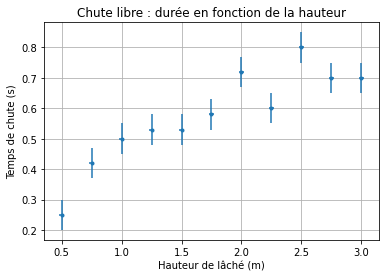

In [13]:
import matplotlib.pyplot as plt

plt.figure() #créeons une nouvelle figure
plt.errorbar(h,deltat,xerr=u_h,yerr=u_deltat,fmt='.') #les incertitudes type sont placées dans les arguments xerr et yerr
# fmt='.' permet de ne pas relier les points (chaque mesure est un point + barre d'incertitude)
plt.grid(which='both') #on ajoute des grilles verticales et horizontales
plt.xlabel("Hauteur de lâché (m)") #on nomme l'axe horizontal
plt.ylabel("Temps de chute (s)") #on nomme l'axe vertical
plt.title("Chute libre : durée en fonction de la hauteur") # titre (optionnel)